Есть 3 метода улучшения качества алгоритма:

- <b>Bagging</b> (Bootstrap Aggregating) - когда мы обучаем алгортм на разных подмножествах данных, потом смешиваем предсказания.

- <b>Stacking</b> - когда мы обучаем разные алгоритмы и на их предсказаниях строим новый мета-алгоритм

- <b>Boosting</b> - когда мы последовательно добавляем алгоритмы, так чтобы каждый новый исправлял ошибки предыдущего

# Идея бустинга

![](imgs/b1.png)
![](imgs/b2.png)
![](imgs/b3.png)
![](imgs/b4.png)
![](imgs/b5.png)

Картинки взяты из https://www.youtube.com/watch?v=sRktKszFmSk&t=1s

<a href="https://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html">Визуализация градиентного бустинга</a>

# Градиентный спуск
Gradient Decent

$$f(x) \longrightarrow  \displaystyle \min_{x} $$
<br>
$$x_{t+1} = x_t-\alpha{f'(x_t)}$$
<br>
$$f_{t+1}(x) = f(x_t-\alpha{f'(x_t)})$$

Populating the interactive namespace from numpy and matplotlib


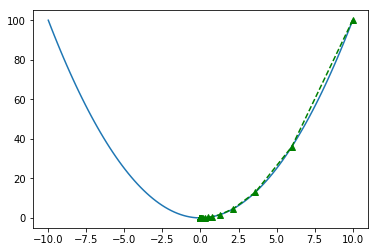

In [1]:
%matplotlib inline
%pylab inline

def func(x):
    return x ** 2

def derivative(x):
    return 2 * x


x_coord = np.linspace(-10, 10, 100)
plot(x_coord, [func(x) for x in x_coord]);

start_point = 10

alpha = 0.2
gradient_steps = [start_point]
for i in range(1000):
    old_point = gradient_steps[-1]
    new_point = old_point - alpha * derivative(old_point)
    gradient_steps.append(new_point)

plot(gradient_steps, [func(x) for x in gradient_steps], 'g--^');

Визуализация градиентного спуска: https://www.youtube.com/watch?v=GCvWD9zIF-s

Разные модификации: https://www.youtube.com/watch?v=OWzkRD6MjYI


# Градиентный бустинг

$b_t(x)$ - ответ одного базового алгоритма (например, дерева), вещественное число для регрессии или [0, 1] - для классификации




Линейная комбинация базовых алгоритмов:
$$u(x) = \begin{equation*}
  \sum_{t=1}^{T+1} \alpha_t b_t(x)
\end{equation*}$$

Функционал качества с произвольной функицей потерь $L(u(x), y)$:
$$ Q(\overline u, \overline y) = \sum_{i=1}^{l} L\Bigl(u(x_i), y_i\Bigr) =   \begin{equation*}
  \sum_{i=1}^{l} L\Bigl(\sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} \longrightarrow  \displaystyle \min_{\overline b, \overline \alpha} $$

Для регрессии L определяется как 
$$L == MSE == (y_i - u(x_i))^2$$
<center>или</center><br>
$$L == MAE == |y_i - u(x_i)|$$

Для классификации:
$$L = [ (u(x_i) - 0.5) \cdot (y_i - 0.5) ]_{-}$$

Еще раз посмотрим на 2 формулы:
    
$$ L_{T+1}(\overline u, \overline y) =  L\Bigl(\begin{equation*}
   \sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} $$

$$f_{t+1}(x) = f(x_t-\alpha{f'(x_t)})$$

Но мы не можем просто так приравнять $b_{T+1}(x_i)$ к $-L'(u_t)$
<br> 
Давайте попробуем построить дерево, которое будет очень похоже на $-L'(u_t)$ на обучающей выборке. 
<br>
Обучаемся на $\Bigl[x_i, −L'(u_t(x_i))\Bigr]$ и получим таким образом $b_{T+1}$

Есть еще одна проблема: $L$ для классификации не дифференцируема по $x_i$. Заменим ее на мажорирующую:

<img src="imgs/2.jpg" width=500>

# Пример использования:     

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.93333333333333335

## XGBoost:
Introduction to Boosted Trees:
http://xgboost.readthedocs.io/en/latest/model.html

In [4]:
from xgboost import XGBClassifier
clf = XGBClassifier() 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.93333333333333335

### Важные параметры:

http://xgboost.readthedocs.io/en/latest/python/python_api.html

objective={"reg:linear", "reg:logistic", 
           "multi:softmax", "multi:softprob", 
           "rank:pairwise", "....etc"}  <br>
           
    -loss-функция. Можно написать самостоятельно

<i> learning_rates </i> - можно настроить убывающую скорость<br>
<i> max_depth </i> - максимальная глубина дерева. Слишком большая глубина ведет к переобучению<br>
<i> subsample, colsample_bytree, colsample_bylevel </i> - сэмплирование по объектам и признакам<br>
<i> min_child_weight </i> - минимальная сумма весов в листе<br>
<i> scale_pos_weight </i> - вес целого класса, используется если один класс заметно чаще встречается, чем другой<br>

Как настраивать: 
    
* Выбираем относительно большой learning_rate ($ \eta \in [0.05, 0.3]$), подбираем оптимальное число деревьев для выбранного $ \eta $

* Настраиваем параметры деревьев, начиная с самых значимых: 
max_depth, min_child_weight, gamma (minimum loss reduction required to make a further partition on a leaf node of the tree), subsample, colsample_bytree

* Настраиваем регуляризации ($ \lambda, \alpha $)

* Уменьшаем learning_rate, пропорционально увеличиваем число деревьев

<a href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/">Complete Guide to Parameter Tuning in XGBoost (with codes in Python) </a>

## CatBoost:
Сравнение с остальными: https://catboost.yandex/#benchmark

Документация: https://tech.yandex.com/catboost/doc/dg/concepts/about-docpage/

Статья: https://arxiv.org/abs/1706.09516

In [5]:
import catboost

In [7]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X_train, y=y_train)
clf.score(X_test, y=y_test)

0:	learn: 0.6256095	total: 60.7ms	remaining: 1m
1:	learn: 0.5749306	total: 70.7ms	remaining: 35.3s
2:	learn: 0.5320146	total: 79.7ms	remaining: 26.5s
3:	learn: 0.4919241	total: 89.7ms	remaining: 22.3s
4:	learn: 0.4542928	total: 98.7ms	remaining: 19.6s
5:	learn: 0.4197637	total: 108ms	remaining: 18s
6:	learn: 0.3885236	total: 119ms	remaining: 16.9s
7:	learn: 0.3557500	total: 131ms	remaining: 16.2s
8:	learn: 0.3314360	total: 147ms	remaining: 16.2s
9:	learn: 0.3069747	total: 164ms	remaining: 16.2s
10:	learn: 0.2924712	total: 180ms	remaining: 16.2s
11:	learn: 0.2700940	total: 196ms	remaining: 16.1s
12:	learn: 0.2514102	total: 209ms	remaining: 15.9s
13:	learn: 0.2346577	total: 225ms	remaining: 15.8s
14:	learn: 0.2191400	total: 246ms	remaining: 16.1s
15:	learn: 0.2036994	total: 265ms	remaining: 16.3s
16:	learn: 0.1856496	total: 283ms	remaining: 16.3s
17:	learn: 0.1726747	total: 298ms	remaining: 16.3s
18:	learn: 0.1620894	total: 309ms	remaining: 15.9s
19:	learn: 0.1520244	total: 324ms	remaini

175:	learn: 0.0043579	total: 1.91s	remaining: 8.92s
176:	learn: 0.0043211	total: 1.92s	remaining: 8.92s
177:	learn: 0.0042966	total: 1.93s	remaining: 8.91s
178:	learn: 0.0042575	total: 1.94s	remaining: 8.9s
179:	learn: 0.0042148	total: 1.95s	remaining: 8.88s
180:	learn: 0.0041718	total: 1.96s	remaining: 8.87s
181:	learn: 0.0041345	total: 1.97s	remaining: 8.86s
182:	learn: 0.0041016	total: 1.98s	remaining: 8.85s
183:	learn: 0.0040652	total: 1.99s	remaining: 8.83s
184:	learn: 0.0040346	total: 2s	remaining: 8.82s
185:	learn: 0.0040004	total: 2.01s	remaining: 8.81s
186:	learn: 0.0039654	total: 2.02s	remaining: 8.79s
187:	learn: 0.0039278	total: 2.03s	remaining: 8.78s
188:	learn: 0.0039054	total: 2.04s	remaining: 8.76s
189:	learn: 0.0038782	total: 2.05s	remaining: 8.75s
190:	learn: 0.0038534	total: 2.06s	remaining: 8.74s
191:	learn: 0.0038211	total: 2.08s	remaining: 8.73s
192:	learn: 0.0037937	total: 2.08s	remaining: 8.72s
193:	learn: 0.0037598	total: 2.1s	remaining: 8.71s
194:	learn: 0.003

334:	learn: 0.0017962	total: 3.75s	remaining: 7.44s
335:	learn: 0.0017906	total: 3.76s	remaining: 7.44s
336:	learn: 0.0017864	total: 3.77s	remaining: 7.43s
337:	learn: 0.0017813	total: 3.79s	remaining: 7.42s
338:	learn: 0.0017750	total: 3.8s	remaining: 7.4s
339:	learn: 0.0017703	total: 3.81s	remaining: 7.39s
340:	learn: 0.0017660	total: 3.82s	remaining: 7.38s
341:	learn: 0.0017599	total: 3.83s	remaining: 7.36s
342:	learn: 0.0017554	total: 3.84s	remaining: 7.35s
343:	learn: 0.0017505	total: 3.85s	remaining: 7.34s
344:	learn: 0.0017436	total: 3.86s	remaining: 7.32s
345:	learn: 0.0017388	total: 3.87s	remaining: 7.31s
346:	learn: 0.0017327	total: 3.88s	remaining: 7.3s
347:	learn: 0.0017277	total: 3.89s	remaining: 7.28s
348:	learn: 0.0017231	total: 3.9s	remaining: 7.27s
349:	learn: 0.0017192	total: 3.91s	remaining: 7.26s
350:	learn: 0.0017141	total: 3.92s	remaining: 7.24s
351:	learn: 0.0017103	total: 3.93s	remaining: 7.23s
352:	learn: 0.0017048	total: 3.94s	remaining: 7.22s
353:	learn: 0.00

495:	learn: 0.0012002	total: 5.39s	remaining: 5.48s
496:	learn: 0.0011977	total: 5.4s	remaining: 5.47s
497:	learn: 0.0011955	total: 5.41s	remaining: 5.46s
498:	learn: 0.0011933	total: 5.42s	remaining: 5.45s
499:	learn: 0.0011914	total: 5.43s	remaining: 5.43s
500:	learn: 0.0011891	total: 5.44s	remaining: 5.42s
501:	learn: 0.0011868	total: 5.45s	remaining: 5.41s
502:	learn: 0.0011839	total: 5.46s	remaining: 5.4s
503:	learn: 0.0011820	total: 5.47s	remaining: 5.38s
504:	learn: 0.0011795	total: 5.48s	remaining: 5.37s
505:	learn: 0.0011773	total: 5.49s	remaining: 5.36s
506:	learn: 0.0011724	total: 5.5s	remaining: 5.35s
507:	learn: 0.0011705	total: 5.51s	remaining: 5.34s
508:	learn: 0.0011682	total: 5.52s	remaining: 5.33s
509:	learn: 0.0011658	total: 5.53s	remaining: 5.31s
510:	learn: 0.0011637	total: 5.54s	remaining: 5.3s
511:	learn: 0.0011618	total: 5.55s	remaining: 5.29s
512:	learn: 0.0011595	total: 5.56s	remaining: 5.28s
513:	learn: 0.0011568	total: 5.57s	remaining: 5.27s
514:	learn: 0.00

657:	learn: 0.0008905	total: 7.05s	remaining: 3.67s
658:	learn: 0.0008894	total: 7.06s	remaining: 3.65s
659:	learn: 0.0008878	total: 7.08s	remaining: 3.65s
660:	learn: 0.0008867	total: 7.09s	remaining: 3.63s
661:	learn: 0.0008858	total: 7.1s	remaining: 3.62s
662:	learn: 0.0008842	total: 7.11s	remaining: 3.61s
663:	learn: 0.0008824	total: 7.11s	remaining: 3.6s
664:	learn: 0.0008811	total: 7.12s	remaining: 3.59s
665:	learn: 0.0008798	total: 7.13s	remaining: 3.58s
666:	learn: 0.0008786	total: 7.14s	remaining: 3.57s
667:	learn: 0.0008773	total: 7.15s	remaining: 3.55s
668:	learn: 0.0008760	total: 7.16s	remaining: 3.54s
669:	learn: 0.0008750	total: 7.17s	remaining: 3.53s
670:	learn: 0.0008738	total: 7.18s	remaining: 3.52s
671:	learn: 0.0008720	total: 7.19s	remaining: 3.51s
672:	learn: 0.0008710	total: 7.2s	remaining: 3.5s
673:	learn: 0.0008697	total: 7.21s	remaining: 3.49s
674:	learn: 0.0008681	total: 7.22s	remaining: 3.47s
675:	learn: 0.0008667	total: 7.22s	remaining: 3.46s
676:	learn: 0.00

835:	learn: 0.0006979	total: 8.89s	remaining: 1.74s
836:	learn: 0.0006972	total: 8.9s	remaining: 1.73s
837:	learn: 0.0006961	total: 8.92s	remaining: 1.72s
838:	learn: 0.0006955	total: 8.93s	remaining: 1.71s
839:	learn: 0.0006944	total: 8.94s	remaining: 1.7s
840:	learn: 0.0006938	total: 8.95s	remaining: 1.69s
841:	learn: 0.0006930	total: 8.96s	remaining: 1.68s
842:	learn: 0.0006921	total: 8.97s	remaining: 1.67s
843:	learn: 0.0006914	total: 8.97s	remaining: 1.66s
844:	learn: 0.0006904	total: 8.99s	remaining: 1.65s
845:	learn: 0.0006895	total: 9s	remaining: 1.64s
846:	learn: 0.0006886	total: 9.01s	remaining: 1.63s
847:	learn: 0.0006878	total: 9.02s	remaining: 1.62s
848:	learn: 0.0006866	total: 9.03s	remaining: 1.6s
849:	learn: 0.0006857	total: 9.04s	remaining: 1.59s
850:	learn: 0.0006847	total: 9.05s	remaining: 1.58s
851:	learn: 0.0006840	total: 9.06s	remaining: 1.57s
852:	learn: 0.0006833	total: 9.07s	remaining: 1.56s
853:	learn: 0.0006825	total: 9.08s	remaining: 1.55s
854:	learn: 0.0006

995:	learn: 0.0005855	total: 11s	remaining: 44ms
996:	learn: 0.0005850	total: 11s	remaining: 33ms
997:	learn: 0.0005842	total: 11s	remaining: 22ms
998:	learn: 0.0005836	total: 11s	remaining: 11ms
999:	learn: 0.0005830	total: 11s	remaining: 0us


0.66666666666666663

In [12]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, 
                           learning_rate=1, loss_function='Logloss', 
                           logging_level='Silent')
#train the model
model.fit(train_data, train_label, cat_features=[0,2,5])
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [ 1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
proba =  [[ 0.45664741  0.54335259]
 [ 0.64913798  0.35086202]
 [ 0.39938828  0.60061172]
 [ 0.29295096  0.70704904]
 [ 0.1459671   0.8540329 ]
 [ 0.47701729  0.52298271]
 [ 0.75011893  0.24988107]
 [ 0.47701729  0.52298271]
 [ 0.31989123  0.68010877]
 [ 0.64913798  0.35086202]
 [ 0.27339024  0.72660976]
 [ 0.59676377  0.40323623]
 [ 0.1459671   0.8540329 ]
 [ 0.59676377  0.40323623]
 [ 0.47701729  0.52298271]
 [ 0.31989123  0.68010877]
 [ 0.64913798  0.35086202]
 [ 0.75011893  0.24988107]
 [ 0.29295096  0.70704904]
 [ 0.47701729  0.52298271]
 [ 0.64913798  0.35086202]
 [ 0.64913798  0.35086202]
 [ 0.29295096  0.70704904]
 [ 0.27339024  0.72660976]
 [ 0.29295096  0.70704904]
 [ 0.29295096  0.70704904]
 [ 0.39938828  0.60061172]
 [ 0.45664741  0.54335259]
 [ 0.47701729  0.52298

CatBoost repo: https://github.com/catboost/catboost

CatBoost tutorials: https://github.com/catboost/catboost/tree/master/catboost/tutorials